# Probability and Bayes

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from src.piApprox import pi_approx
import src.monty_hall as mh

%matplotlib inline

## Calculating Probabilities

Note: some of this text comes from [_OpenIntro Statistics_](https://www.openintro.org/book/os/), Chapter 3.

In general, calculating probabilities is a matter of dividing the outcome you're exploring by all possible outcomes:

$$\large P(Event) = \frac{|Event|}{|Sample\ Space|} $$

We are often interested in calculating the probability that *either* event $A$ or event $B$ occur, or the probability that *both* events $A$ and $B$ occur.

In describing these sorts of probabilities, we generally borrow some notation from set theory and use the set "union" symbol ($\cup$) for "or" and the set "intersection" symbol ($\cap$) for "and".

(If I collect the $A$ and $B$ possibilities into a set, then to ask about the probability of $A$ **or** $B$ is to ask about the probability of an event occurring from the **union** of $A$ and $B$, $A\cup B$. Similarly, to ask about the probability of $A$ **and** $B$ is to ask about the probability of an event occuring from the **intersection** of $A$ and $B$, $A\cap B$.)

### General Addition Rule

The probability that either $A$ or $B$ will occur can be calculated by adding each individual probability, and then subtracting the probability that both occur together:

$$\large P(A \cup B) = P(A) + P(B) − P(A \cap B)$$

Remember, $P(A \cap B)$ expresses the overlap between the two events - if you don't subtract that overlap, then you double count the instances when **both** $A$ and $B$ occur!

### Multiplication Rule for Independent Processes

A special condition is when the outcome of $A$ has no bearing on the outcome of $B$. We say these two events are **independent** (e.g. rolling a die and tossing a coin).

If $A$ and $B$ represent events from two different and **independent** processes, then the probability
that both $A$ and $B$ occur can be calculated as the product of their separate probabilities:

$$\large P(A \cap B) = P(A) * P(B)$$

### 🧠 Knowledge Check

### 1) AND Question:

What is the probability of rolling a 5 on a fair die _and_ getting a tails on a fair coin toss?

**Your answer here**:

- 



<details>
    <summary>Answer</summary>

We're checking for the intersection of these sets. Of the six possible outcomes on a die roll only one (the 5) will do. So the chance of getting a 5 on a die is 1/6. Of the two possible outcomes on a coin toss again only one (tails) will do. So the chance of getting tail on a coin toss is 1/2.

So the calculation is: $$\large P(5 \cap tails) = \left(\frac{1}{6}\right)*\left(\frac{1}{2}\right) = \frac{1}{12}$$
</details>

### 2) OR Question: 

What is the probability of rolling a 5 on a die _or_ getting a tails on a coin toss?

**Your answer here**:

- 



<details>
    <summary>Answer</summary>
    
   We're now checking for the union of these sets. Here we want to count all the die-coin combinations where we have a 5 on the die AND all the die-coin combinations where we have a tails on the coin. 

$$\large P(5 \cup tails) $$

**BUT:**

If the die is 5, that includes two possibilities: 5-heads and **5-tails**.

Our coin is tails, that includes six possibilities: 1-tails, 2-tails, 3-tails, 4-tails, **5-tails**, and 6-tails.

But then we've counted the combination where **both** the 5 and the tails occur **twice**.

So the correct calculation is the sum of the individual probabilities **less the probability of their intersection**:

$$\large P(5 \cup tails) = \left(\frac{1}{6}\right) + \left(\frac{1}{2}\right) - \left(\left(\frac{1}{6}\right)*\left(\frac{1}{2}\right)\right) = \frac{7}{12} $$
    </details>

## Enough Talk - Let's Explore in Python!

### Mushroom dataset

Let's look at a modified version of the Mushroom dataset from UCI [here](https://archive.ics.uci.edu/ml/datasets/Mushroom). Each row in this dataset corresponds to one observation (one mushroom). 

In [3]:
df = pd.read_csv('data/Mushrooms_cleaned.csv')
df.head()

,edible-poisonous,gill-spacing,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,gill-color,bruised
0,poisonous,close,enlarging,white,white,black,True
1,edible,close,enlarging,white,white,black,True
2,edible,close,enlarging,white,white,brown,True
3,poisonous,close,enlarging,white,white,brown,True
4,edible,crowded,tapering,white,white,black,False


In [4]:
df.describe()

,edible-poisonous,gill-spacing,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,gill-color,bruised
count,8124,8124,8124,8124,8124,8124,8124
unique,2,2,2,9,9,12,2
top,edible,close,tapering,white,white,buff,False
freq,4208,6812,4608,4464,4384,1728,4748


#### 1) If you picked a row from this dataset at random, what is the probability it corresponds to a bruised mushroom? 

In other words, find $P(bruised)$

In [45]:
df['bruised'].value_counts(normalize = True)

bruised
False    0.584441
True     0.415559
Name: proportion, dtype: float64

In [5]:
print(len(df.index))
print(len(df.loc[df['bruised'] == True].index))

len(df.loc[df['bruised'] == True]) / len(df)

8124
3376


0.4155588380108321

In [6]:
# Another way
p_bruised = df[df['bruised'] == True].shape[0]/df.shape[0]
p_bruised

0.4155588380108321

In [49]:
# Let's see...
df.sample(1)

,edible-poisonous,gill-spacing,stalk-shape,stalk-color-above-ring,stalk-color-below-ring,gill-color,bruised
4361,poisonous,close,enlarging,pink,pink,gray,False


#### 2) What is the probability you pick a row corresponding to a mushroom that is bruised _AND_ edible?

$P(edible \cap bruised)$

BUT! Are they independent events ...?

In [50]:
p_bruised_and_edible = df[(df['bruised'] == True) df.shape[0& (df['edible-poisonous'] == 'edible')].shape[0]/]

p_bruised_and_edible

0.33874938453963566

Are being bruised and being edible independent of each other?

> Formally, $A$ and $B$ are *independent* if and only if the probability that *both* $A$ *and* $B$ happen is:
> 
> $$\large P(A \cap B) = P(A) * P(B)$$

In [51]:
p_bruised

0.4155588380108321

In [15]:
p_edible = len(df[df['edible-poisonous'] == 'edible'])/len(df)
p_edible

0.517971442639094

In [52]:
p_bruised * p_edible

0.21524761082589627

In [53]:
p_bruised_and_edible == p_bruised * p_edible

False

## Enter: Conditional Probability

### When do we compute conditional probabilities? 

We need to compute conditional probabilities when the outcome of an event depends on the outcome of previous events (**dependent** events). A conditional probability of an event is the probability of the event *given* another event has occurred.


When events _are_ independent, the rule for probabilistic AND (I'll use '$\cap$' below) is simple:

$$\large P(A\cap B) = P(A) * P(B)$$

But the more general rule, which includes non-independent events, is:

$$\large P(A\cap B) = P(A | B) * P(B)$$

> (this is pretty much the law of total probability, we'll revisit this later!)

In fact, this is the definition of conditional probability. Rearranging:

$$\large P(A | B) = \frac{P(A\cap B)}{P(B)}$$

The `|` here should be read as "given". We are given some information, $B$, and thus it reduces our sample space!

### Back to our Mushrooms!

#### 3) What is the probability of picking an edible mushroom given it is bruised? 

$P(edible | bruised)$

p_edible_given_bruised = p_bruised_and_edible/p_bruised
p_edible_given_bruised

In [18]:
bruised = df[df['bruised'] == True]
bruised['edible-poisonous'].value_counts(normalize=True)

edible-poisonous
edible       0.815166
poisonous    0.184834
Name: proportion, dtype: float64

#### 4) What is the probability of picking a bruised mushroom given it is edible? 

$P(bruised | edible)$

In [55]:
p_edible = df[df['edible-poisonous'] == 'edible'].shape[0]/df.shape[0]
p_edible

0.517971442639094

In [56]:
p_bruised_and_edible 

0.33874938453963566

In [57]:
p_bruised_given_edible = p_bruised_and_edible/p_edible
p_bruised_given_edible

0.6539923954372624

In [58]:
edible = df[df['edible-poisonous'] == 'edible']
edible['bruised'].value_counts(normalize=True)

bruised
True     0.653992
False    0.346008
Name: proportion, dtype: float64

### Intuition behind conditional probability: 

How do you compute the probability that mushrooms are edible given they are bruised? 

When you ask the question "what is the probability that the mushrooms are edible and bruised?", the sample space originally contains all 8124 rows of mushrooms. 

<img src="images/Image_72_Cond4.png" width="300">

However, to compute the probability that the mushrooms are edible given they are bruised, you need to consider the reduced size of the sample space. 

In the image above, S is the universe of all mushrooms in the dataset, A is the set of mushrooms that are edible, and B is the set of mushrooms that are bruised.

* When you ask the question "what is the probability that the mushrooms are edible given the mushrooms are bruised?", you have effectively reduced the size of the sample space to include only those mushrooms that are bruised. 

* Given that mushrooms are bruised, the only way for the mushrooms to be edible is for these mushrooms to fall in the intersection of the set of mushrooms that are edible _and_ the set of mushrooms that are bruised , $P(edible \cap bruised)$.  

* To account for the smaller sample space, you divide the probability mushrooms are edible and bruised by the probability the mushrooms are bruised: $$\large P(edible|bruised) = \frac{P(edible \cap bruised)}{P(bruised)}$$

## Law of Total Probability

Sometimes we want to calculate an **unconditional** probability by making use of some **conditional** probabilities. Enter the Law of Total Probability:

$$\large P(A)=\sum _{n}P(A\cap B_{n})$$

Which works out to: 

$$\large P(A)=\sum _{n}P(A\mid B_{n}) * P(B_{n})$$

Where $B_{n}$ captures all of the disjoint events that combine to define the sample space, so $\sum P(B_{n}) = 1$.

#### In practice:

Let's say we want to know the likelihood that a mushroom is **edible**. If we know the likelihood that all tapering stalk mushrooms are edible, and the likelihood that not-tapering-stalk mushrooms are edible, plus how likely it is that mushrooms have tapering stalks (and thus also how likely the mushroom does _not_ have a tapering stalk, the compliment of the mushrooms having a tapering stalk) - well, we can use all of that to find the likelihood our mushroom will be edible! 

$$\large P(\text{edible}) = P(\text{edible} | \text{tapering}) * P(\text{tapering}) + P(\text{edible} | \text{not tapering}) * P(\text{not tapering})$$

We can do this because 'tapering stalk' and 'not tapering stalk' capture all of the possibilities of mushrooms - they define our entire sample space!

In [22]:
# First let's find our tapering and not-tapering subsets
tapering = df.loc[df['stalk-shape'] == 'tapering']

not_tapering = df.loc[df['stalk-shape'] != 'tapering']

In [23]:
# Calculate our probability of tapering, and probability of not-tapering
p_tapering = len(tapering) / len(df)

p_not_tapering = len(not_tapering) / len(df)
# same as 
# p_not_tapering = 1 - p_tapering

# Now calculate our two conditional probabilties
p_edible_given_tapering = len(
    tapering.loc[tapering['edible-poisonous'] == 'edible']) / len(tapering)

p_edible_given_not_tapering = len(
    not_tapering.loc[not_tapering['edible-poisonous'] == 'edible']) / len(not_tapering)

# Do the math!
p_edible_given_tapering * p_tapering + p_edible_given_not_tapering * p_not_tapering

0.517971442639094

In [59]:
# Sanity check
len(df.loc[df['edible-poisonous'] == 'edible'])/len(df)

0.517971442639094

## Partitioning Complex Events

You're not really a mushroom expert, but you can see that the mushroom in your hand is has some orange on the stalk. Given the data at your disposal, what's the probability that the mushroom is edible?



$$\large P(\text{edible|orange stalk}) = \frac{P(\text{edible} \cap \text{orange stalk})}{P(\text{orange stalk})}$$

Furthermore, we can decompose $P(\text{orange stalk})$ into the two possibilities:

$P(\text{orange stalk}) = P(\text{orange stalk below ring}\cup\text{orange stalk above ring})$

But be careful here! 

$P(\text{orange stalk below ring}\cup \text{orange stalk above ring})$ **DOES NOT EQUAL** $P(\text{orange stalk below ring}) + P(\text{orange stalk above ring})$

While this may seem correct, adding these individual probabilities **double counts** mushrooms which have entirely orange stalks. However - when we do these things in Pandas (using a loc and an or condition), it won't duplicate the row - so you don't need to worry about it here!

In [25]:
# Can prove that P(orange above) + P(orange below) != p(orange stalk)
p_orange_above = df[df['stalk-color-above-ring'] == 'orange'].shape[0]/df.shape[0]
p_orange_below = df[df['stalk-color-below-ring'] == 'orange'].shape[0]/df.shape[0]

p_orange_stalk = df[(df['stalk-color-above-ring'] == 'orange')
                    | (df['stalk-color-below-ring'] == 'orange')
                    ].shape[0]/df.shape[0]

p_orange_stalk == (p_orange_above + p_orange_below)

False

In [26]:
# Now let's find P(edible | orange stalk)
p_edible_and_orange = df[((df['stalk-color-above-ring'] == 'orange')
                          | (df['stalk-color-below-ring'] == 'orange')
                          )
                         & (df['edible-poisonous'] == 'edible')
                         ].shape[0]/df.shape[0]

p_edible_given_orange = p_edible_and_orange / p_orange_stalk

p_edible_given_orange

1.0

In [27]:
# Apparently orange-stalk mushrooms seem fairly safe....
# (Disclaimer: don't take this as definitive foraging adivce!)

# Sanity check...
df.loc[(df['stalk-color-above-ring'] == 'orange')
       | (df['stalk-color-below-ring'] == 'orange')]['edible-poisonous'].unique()

array(['edible'], dtype=object)

### Extra Credit: Additional Conditional Probability Practice

What's the probability that a mushroom is poisonous if it has close gill spacing AND a tapering stalk?

$$\large P(poisonous|close \cap tapering) = \frac{P(poisonous \cap close \cap tapering)}{P(close \cap tapering)}$$

In [28]:
# P that mushroom is poisonous given close gill spacing and tapering stalk


## Bayesianism

The Bayesian treats probabilities as **subjective**, and in particular as rational **degrees of belief** in states of affairs. And the classic use case for Bayesian reasoning is in **updating** one's subjective probability about something, **conditional on** some new evidence that comes in.

### A Famous Example

Suppose some rare disease affects 1 in 100,000 people. There is a test for it, though it is imperfect: 5% of the people who have the disease will test negative and 4% of the people who don't have the disease will test positive for it. You take the test and test positive. Before the test the probability that you had the disease was only 1 in 100,000. But now, with this new information of the positive test, how should you judge the probability that you have the disease?

We can use **Bayes's Theorem**:

$\large P(h | e) = \frac{P(e | h)P(h)}{P(e)}$.

Terminology:
<table>
    <tr>
        <th>term</th>
        <th>name</th>
    </tr>
    <tr>
        <td>P(h)</td>
        <td>prior</td>
    <tr>
        <td>P(h|e)</td>
        <td>posterior</td>
    <tr>
        <td>P(e|h)</td>
        <td>likelihood</td>
    </tr>
    <tr>
        <td>P(e)</td>
        <td>scaler</td>
    </tr>
</table>

That is, for our problem: The (new) probability that I have the disease (i.e. the posterior) is equal to the unconditional probability that I have the disease (i.e. the prior) multiplied by the probability that someone who has the disease tests positive (i.e. the likelihood) divided by the probability of testing positive (i.e. the scaler).

To calculate the denominator, we'll need to make use of the **Law of Total Probability**.

Remember that the Law of Total Probability tells us how to calculate an unconditional probability given a partitioning collection of conditional probabilities. In a Bayesian context, we can think of this law as saying: Suppose there are $n$-many hypotheses $h_1, ... , h_n$, that could explain some bit of evidence $e$. If I know all of the **conditional** probabilities $P(e | h_1), ... , P(e | h_n)$, then I can use the Law of Total Probability to calculate the **unconditional probability** $P(e)$.

In our case, there are only two possible hypotheses: Either I have the disease or I do not.

So if we put the Law of Total Probability together with Bayes's Theorem here we get:

$\huge P(h_1|e) = \frac{P(h_1)*P(e|h_1)}{P(h_1)*P(e|h_1)+P(h_2)*P(e|h_2)}$, where:

$h_1$: I have the disease

$h_2$: I do not have the disease

$e$: I test positive

In [ ]:
pa = .0001 
pnota =.9999
p(b) .96
p(-b).04 


In [62]:
a = (0.00001 * 0.95)
b=  (0.00001 * 0.95 + 0.99999 * 0.04)


a/b 

# Notice that the likelihoods (P(e | h_1) and P(e | h_2)) do NOT sum to 1!

0.00023744598103931353

In [63]:
1/4000

0.00025

#### 

The probability that I have the disease is still less than 1 in 4000!

### The Monty Hall Problem

Bayesian reasoning applies naturally and neatly to the famous Monty Hall Problem.

The situation is this: Monty Hall, classic and original host of the TV game show "Let's Make a Deal", has told you, the contestant, that there is some fantastic prize behind one of three curtains. Suppose, without loss of generality, that you select Door \#1.

Now here's where the story gets interesting. Hall then shows you that the prize is NOT behind one of the other two curtains. Let's suppose, again without loss of generality he opens Door \#2.

Note a few things at this point:

1. Hall will never show you what's behind the door you selected.
2. Hall will never show you where the good prize is.
3. \#1 and \#2 notwithstanding, Hall will always be able to show you what's behind one of the doors without revealing where the prize is.

Then Hall asks you if you'd like to *switch* your pick to the remaining door.

The question is: Do you have any reason to switch? Or do you have any reason to stick with your original choice?

It is natural to reason in the following way: Either the prize is behind Door \#1, the one I picked, or it is behind Door \#3. Clearly, the fact that Hall opened Door \#2 could not have had any effect on the location of the prize, so there is no reason to prefer Door \#1 or Door \#3. So the probability that the prize is behind either of the two remaining doors is 50%.

But this reasoning is wrong! The fallciousness of this reasoning was pointed out in a magazine column in the 1980s, although the writer of the column received much criticism from many "experts" who were arguing that the reasoning was perfectly sound. (There's a nice article about the history here: https://priceonomics.com/the-time-everyone-corrected-the-worlds-smartest/.)

The truth is that you ought to switch! The truth is that, while there is only 1 chance in 3 that the door you originally selected has the prize, there are 2 chances in 3 that the other door has the prize.

Let's see if we can proceed through this puzzle in Bayesian terms.

#### Posterior Probability that the Prize Is Behind Your Door
Let's calculate the posterior probability that the prize is behind Door \#1, given the evidence that Hall shows you that it is not behind Door \#2:

What is the *prior* probability that the prize is behind Door \#1?

In [64]:
prior_1 = 1/3
prior_1

0.3333333333333333

Now let's consider the likelihood of the evidence: What is the probability that Hall would show you that it is not behind Door \#2, given the hypothesis that the prize is behind Door \#1?

In [31]:
likelihood_1 = 0.5
likelihood_1

0.5

Finally, let's calculate the probability of the evidence itself:

There are three salient hypotheses to consider:

- $h_1$: The prize is behind Door \#1.
- $h_2$: The prize is behind Door \#2.
- $h_3$: The prize is behind Door \#3.

And our evidence is:

- $e$: Hall shows you that the prize is not behind Door \#2.

We can calculate the probability as follows:

$P(e) = P(e | h_1)\times P(h_1) + P(e | h_2)\times P(h_2) + P(e | h_3)\times P(h_3)$.

We've already made the calculation for the first term:

$P(e | h_1)\times P(h_1) = \frac{1}{2}\times\frac{1}{3} = \frac{1}{6}$.

Now:

The probability that Hall would show you Door \#2, given that the prize is behind Door \#2, is *zero*. (This is by the rules of the game.)

The probability that Hall would show you Door \#2, given that the prize is behind Door \#3, is *one*. (Here Hall's hand would be forced, since he can, by the rules, show you neither the door that you chose (\#1) nor the door with the prize (\#3).)

So we have:

$P(e) = \frac{1}{2}\times\frac{1}{3} + (0)\times\frac{1}{3} + (1)\times\frac{1}{3} = \frac{1}{2}$.

We are finally in a position to calculate the posterior! We have:

$\large P(h_1 | e) = \frac{P(e | h_1)\times P(h)}{P(e)} = \frac{1 / 6}{1 / 2} = \frac{1}{3}$.

That is, our updated probability that the prize is behind Door \#1 is just the same as the prior. It's still just $\frac{1}{3}$.

#### Posterior Probability that the Prize Is Behind the Other Door

The posterior probability that the prize is behind Door \#3, given the evidence that Hall has shown you what's behind Door \#2, ought to work out to $\frac{2}{3}$. Let's verify this:

What is the *prior* probability that the prize is behind Door \#3?

In [65]:
prior_3 = 1/3
prior_3

0.3333333333333333

Now the likelihood: What's the probability that Hall would show you Door \#2, given that the prize is behind Door \#3?

In [33]:
likelihood_3 = 1
likelihood_3

1

We've already made our calculation of the evidence. From before we had:

$P(e) = \frac{1}{2}\times\frac{1}{3} + (0)\times\frac{1}{3} + (1)\times\frac{1}{3} = \frac{1}{2}$.

So now we are in a position to calculate the posterior probability that the prize is behind Door \#3. We have:

$\large P(h_3 | e) = \frac{P(e | h_3)\times P(h)}{P(e)} = \frac{1 / 3}{1 / 2} = \frac{2}{3}$.

Given that Hall shows us what's behind Door \#2, we should now update our degree of belief that the prize is behind Door \#3 to $\frac{2}{3}$!

#### Let's use `monty_hall.py`!

In [34]:
mh.play_mh(my_sel=2)

Monty reveals a goat behind Door #1
Do you wish to swap to Door #3?
y or n: 
You open Door #2 and . . . YOU WIN THE CAR!


1

In [66]:
mh.stats_mh()

1

In [67]:
swapping = []
not_swapping = []
for _ in range(100000):
    swapping.append(mh.stats_mh(swap=True))
    not_swapping.append(mh.stats_mh(swap=False))
print(sum(swapping) / 100000)
print(sum(not_swapping) / 100000)

0.66957
0.33523


### Likelihoods and Estimation

The idea of using evidence (including experimental results) to guess at parameter values or at underlying distributions is very powerful, but it is an idea that doesn't make any sense under traditional (objectivist) understandings of probability. Once we move, however, to the Bayesian framework, under which probabilities are to be thought of as subjective (but rational!) degrees of belief, we can make sense of:

- assigning probabilities to a single event
- assigning probabilities to various distributions as underlying the data we've collected
- MLE and MAP techniques

### Maximum Likelihood Estimation

Harry the Hat, a famous magician, gives you a coin as a gift. It looks like an ordinary penny, but you know that Harry has some trick coins in his collection, so you're curious to know whether it's fair. So you flip it five times. You get three heads and two tails. And so now, with these results, you're musing about the possible weightings of the coin.

Notice that this is the reverse of a more stereotypical situation where you *know* the weighting of the coin and then calculate the probabilities of various coin-flip results. In fact this sort of problem makes sense only in a *Bayesian* context where we're allowing ourselves to assign probabilities to states of the world (the weighting of the coin, in the present case).

But given this allowance, we can think about the associated ***likelihood*** as a function of the coin's weighting: $P(e | h) = P(3H, 2T | p)$, where $p$ is the probability of getting a H on one toss.

A natural move to make, then, is to find where this function achieves a ***maximum*** value. And, given our understanding of combinatorics and of the Binomial Distribution, we know how to calculate the values of this function.

The probability of getting three heads and two tails on five tosses, with $p$ defined as above, is:

$\binom{5}{3}\times p^3\times(1 - p)^2$.

So let's graph this function for several values of $p$ and find where it hits its maximum value!

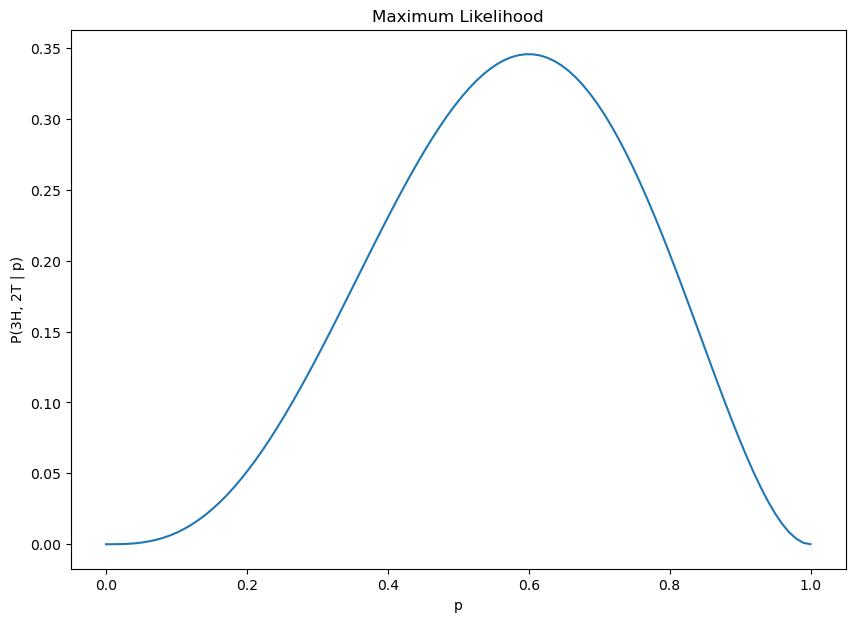

In [37]:
X = np.linspace(0, 1, 100)
Y = 10 * X**3 * (1-X)**2

plt.figure(figsize=(10, 7))
plt.plot(X, Y)
plt.title('Maximum Likelihood')
plt.xlabel('p')
plt.ylabel(f'P(3H, 2T | p)');

What do we notice about this value of $p$ where the likelihood finds its maximum? How is it related to our sample results?

#### Calculus Trick

Of course, we don't have to rely on eyeballing a graph to calculate the maximum of a function. We can use an old calculus trick:

Consider the maximum of a function $f$; suppose it occurs at $x = x_{0}$. Now $f'$, the derivative of $f$, tells us how that function is changing at any value of $x$. And so that means that:
- $f'(x) > 0$ for $x < x_{0}$; and
- $f'(x) < 0$ for $x > x_{0}$.

And in particular we can show that $f'(x_{0}) = 0$. Similar reasoning shows the same fact about minima.

Thus if we have a differentiable function for which we seek its maxima or minima, we just need to solve the equation $f'(x) =  0$ for $x$.

### Maximum A Posteriori Estimation

The maximum likelihood may be a good estimate of the fairness of Harry the Hat's coin, but recall that we have *no prior beliefs* about the coin's weighting.

If we *do* have some prior belief about the fairness of the coin, then we can use Bayes's Rule to update our belief, and this is what ***maximum a posteriori (MAP)*** estimation is all about.

Often the prior and the likelihood functions work together in such a way that the posterior will have exactly the same distribution as the prior. This is called [**conjugacy**](https://en.wikipedia.org/wiki/Conjugate_prior).

#### Example: The Worst Hitter in MLB History

In this project FIS's own Greg Damico uses a MAP technique to explore the question of who could fairly be called the worst hitter in the history of the major leagues.

https://github.com/gadamico/Sports-Data/


https://www.linkedin.com/pulse/worst-hitter-history-major-league-baseball-bayesian-approach-damico/

## Level Up: Analytically Intractable Problems and Indeterministic Approximation Methods

In general, there will be infinitely many possible probability distributions responsible for the observations we've made.

A Bayesian might make use of *Monte Carlo sampling* here:

(i) choose some distribution-defining parameters randomly; <br/>
(ii) calculate the likelihood of the data having come from that distribution; <br/>
(iii) "step" randomly to a new set of parameter values and do (i) and (ii) again <br/>
(iv) if the newly calculated likelihood is higher than the old, then take another "step" *from* those new parameter values <br/>
(v) repeat until your likelihood isn't getting any higher.

Monte Carlo sampling is often used to approximate values of definite integrals that have no analytic solution. The classic example here is [the estimation of pi](https://en.wikipedia.org/wiki/Monte_Carlo_integration#Example).

### Let's use `piApprox.py`!

In [38]:
pi_approx(n=10)

3.2

In [39]:
guesses = []
for _ in range(100):
    guesses.append(pi_approx(100))
np.mean(guesses)

3.1567999999999996

In [40]:
guesses = []
for i in range(1000):
    guesses.append(pi_approx(1000))
np.mean(guesses)

3.1444680000000003

## Level Up: Objective and Subjective Probability

Philosophers wonder about the best way to understand what probabilities are. The main division is between those who want to understand probabilities _objectively_ and those who want to understand probabilities _subjectively_.

### Historical Relevance
In the early twentieth century, the quantum theory being developed by physicists was saying that the location (etc.) of a particle could be represented by a probabilistic wave function that gave probabilities for the particle to be in one place rather than another. And this question of how to understand these probabilities reared its head. Albert Einstein argued that they could only be interpreted subjectively, but the dominant interpretation today is that there is a kind of indeterminacy in the universe itself.

### Objective Probability
The paradigmatic theory of _objective_ probability is frequentism, which says that probabilities are a measure of the long-run behvior of physical systems. To say that a die has a 1/6 chance of coming up "6" when tossed, for example, is to say that, in the long run as the number of tosses increases without bound, the number of "6"s rolled will constitute one sixth of all tosses.

On this point of view, **we cannot speak meaningfully of the probability of a single event**. Once a die has been rolled, there is no non-trivial probability of its having come up "6" or not. Either it did (in which case the probability is 1) or it did not (in which case the probability is 0).

Similarly, **we cannot speak meaningfully of the probability of a parameter having a certain value, or of a hypothesis being true**. The frequentist will reject the idea of a (meaningful) probability of a die being unfairly weighted. Either it is or it is not.


### Subjective Probability
The paradigmatic theory of _subjective_ probability is Bayesianism, which says that probabilities are better understood as rational _degrees of belief_. The standard of rationality is necessary here to assure that these degrees of belief will conform to the probability calculus.

If probabilities are degrees of belief, then it _does_ make sense to apply them to parameters or to hypotheses. The probability of a die being unfairly weighted would simply represent what it would be rational to believe about the die with respect to its being weighted or not.

Now: Crucially, what it is rational to believe about the die with respect to its being weighted or not _is a function of what we know about the die!_

In particular, if we gain the evidence (or knowledge) that the die has been rolled 100 times and come up "5" 90 times, then this would have (or, rather, *ought, rationally, to have*) a significant impact on our degree of belief with respect to the weightedness of the die. This is the sort of idea that Thomas Bayes had.